# 📊 Opis Zbiorów Danych

## 1. **Better Life Index (2024)**
Ten zbiór danych zawiera informacje o jakości życia w różnych krajach. Zawiera 38 wierszy (po jednym na kraj) i 26 kolumn. Kluczowe cechy:
- **Country**: Nazwa kraju.
- **GDP per capita (USD)**: PKB na mieszkańca w dolarach amerykańskich.
- Różne metryki związane z mieszkaniem, edukacją, dochodami, zatrudnieniem, zdrowiem i bezpieczeństwem:
  - `Housing expenditure`, `Rooms per person`, `Household net wealth`.
  - `Life expectancy` (oczekiwana długość życia), `Self-reported health` (samoocena zdrowia), `Feeling safe walking alone at night` (poczucie bezpieczeństwa w nocy).
  - `Time devoted to leisure and personal care` (czas poświęcony na odpoczynek i sprawy osobiste).
- Niektóre kolumny mają brakujące wartości, np. `Time devoted to leisure and personal care` występuje tylko dla 22 krajów.

---

## 2. **Global Power Plant Database**
Ten zbiór danych zawiera informacje o elektrowniach na całym świecie. Zawiera 34 936 wierszy i 36 kolumn. Kluczowe cechy:
- **Country**: Skrócona i pełna nazwa kraju.
- **Name**: Nazwa elektrowni.
- **Capacity (MW)**: Moc w megawatach (MW).
- **Primary Fuel**: Główny rodzaj paliwa (np. Hydro, Solar).
- **Generation data (2013–2019)**: Dane dotyczące wytwarzania energii elektrycznej (rzeczywiste i szacowane) w gigawatogodzinach (GWh).
- Dane geograficzne, takie jak szerokość i długość geograficzna oraz źródło danych geolokalizacyjnych.
- Niektóre kolumny, takie jak `commissioning_year` (rok uruchomienia) i `owner` (właściciel), mają znaczące braki w danych.

---

## 3. **Electric Vehicle Population**
Ten zbiór danych zawiera informacje o pojazdach elektrycznych (EV) zarejestrowanych w wybranym regionie. Zawiera 181 458 wierszy i 17 kolumn. Kluczowe cechy:
- **VIN (1-10)**: Numer identyfikacyjny pojazdu.
- **Make** i **Model**: Producent i konkretny model pojazdu.
- **Electric Vehicle Type**: Typ pojazdu elektrycznego (np. Battery Electric Vehicle – BEV, Plug-in Hybrid Electric Vehicle – PHEV).
- **Electric Range**: Maksymalny zasięg pojazdu na pełnym ładowaniu.
- **Base MSRP**: Sugerowana cena detaliczna producenta.
- **Dane lokalizacyjne**: Informacje o hrabstwie, mieście, stanie oraz dokładna geolokalizacja.
- **Clean Alternative Fuel Vehicle Eligibility**: Informacja o zgodności pojazdu z przepisami dotyczącymi paliw alternatywnych.
- Zawiera także szczegółowe dane o dostawcach energii elektrycznej i lokalizacjach zasięgu EV.

Każdy zbiór danych dostarcza unikalnych informacji i może być wykorzystany do różnych analiz, takich jak porównania społeczno-ekonomiczne, efektywność elektrowni czy trendy adopcji pojazdów elektrycznych.


In [1]:
# Importowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Ścieżki do plików CSV
better_life_index_path = "data/better-life-index-2024.csv"
power_plant_path = "data/power_plant_database_global.csv"
ev_population_path = "data/electric_vehicle_population_data.csv"

# Wczytanie plików CSV
better_life_index_df = pd.read_csv(better_life_index_path)
power_plant_df = pd.read_csv(power_plant_path)
ev_population_df = pd.read_csv(ev_population_path)


C:\Users\MP\AppData\Local\Temp\ipykernel_24976\785962221.py:13: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  power_plant_df = pd.read_csv(power_plant_path)


In [2]:
import sys
print(sys.executable)

c:\Users\MP\AppData\Local\Programs\Python\Python313\python.exe


# 📊 Zadania z datasetu Electric Vehicle Population

### **Część 1: Analiza podstawowa**


In [3]:
ev_population_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10



1. **Liczba unikalnych producentów i modeli**  
   Wyświetl liczbę unikalnych producentów pojazdów elektrycznych (`Make`) i unikalnych modeli (`Model`).  
   **Hint:** Użyj metody `.nunique()`.

In [12]:
unique_producents = ev_population_df[['Make', 'Model']].nunique()

print(unique_producents)

Make      40
Model    143
dtype: int64



2. **Liczba pojazdów BEV i PHEV**  
   Policz liczbę pojazdów typu `Battery Electric Vehicle (BEV)` i `Plug-in Hybrid Electric Vehicle (PHEV)`.  
   **Hint:** Użyj metody `.value_counts()` na kolumnie `Electric Vehicle Type`.


In [14]:
ev_population_df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            141973
Plug-in Hybrid Electric Vehicle (PHEV)     39485
Name: count, dtype: int64

3. **Statystyki zasięgu**  
   Znajdź średni, minimalny i maksymalny zasięg (`Electric Range`) pojazdów elektrycznych.  
   **Hint:** Użyj metody `.describe()` lub poszczególnych funkcji takich jak `.mean()`, `.min()`, `.max()`.


In [55]:
ev_population_df['Electric Range'].describe()
ev_population_df['Electric Range'].agg(['mean','min','max'])


mean     57.826665
min       0.000000
max     337.000000
Name: Electric Range, dtype: float64

4. **5 pojazdów o największym zasięgu**  
   Wyświetl 5 pojazdów o największym zasięgu (`Electric Range`).  
   **Hint:** Skorzystaj z funkcji `.nlargest()`.


In [60]:
ev_population_df.nlargest(5,'Electric Range')[['Make','Model','VIN (1-10)']]

,Make,Model,VIN (1-10)
2321,TESLA,MODEL S,5YJSA1E46L
4232,TESLA,MODEL S,5YJSA1E43L
5995,TESLA,MODEL S,5YJSA1E4XL
7255,TESLA,MODEL S,5YJSA1E48L
15390,TESLA,MODEL S,5YJSA1E44L



5. **Najpopularniejsze modele**  
   Wyświetl 5 modeli pojazdów elektrycznych, które najczęściej występują w danych.  
   **Hint:** Użyj metody `.value_counts()` na kolumnie `Model`.


In [ ]:
ev_population_df['Model'].value_counts()

Model
MODEL Y        37007
MODEL 3        30150
LEAF           13356
MODEL S         7731
BOLT EV         6935
               ...  
750E               1
CYBERTRUCK         1
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 143, dtype: int64


---

### **Część 2: Filtrowanie i grupowanie danych**

6. **Pojazdy w stanie WA z zasięgiem > 200**  
   Znajdź pojazdy wyprodukowane w stanie `WA`, które mają zasięg większy niż 200 mil.  
   **Hint:** Użyj operatorów logicznych (`&`) oraz filtrowania na DataFrame.

In [22]:
mask = (ev_population_df['State'] == 'WA') & (ev_population_df['Electric Range'] > 200) 
ev_population_df[mask]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
7,5YJ3E1EB5L,Snohomish,Mountlake Terrace,WA,98043.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,1.0,6293899,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10
10,1G1FW6S03J,Snohomish,Bothell,WA,98021.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,1.0,187858821,POINT (-122.2107298 47.7977268),PUGET SOUND ENERGY INC,5.306105e+10
11,5YJSA1S22F,King,Seattle,WA,98121.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,36.0,143405748,POINT (-122.344125 47.61546),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181431,5YJSA1E25G,Kitsap,Bainbridge Island,WA,98110.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,23.0,475647490,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
181436,5YJ3E1EA4L,King,Woodinville,WA,98077.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,45.0,3595574,POINT (-122.071404 47.749164),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181439,5YJ3E1EB9K,Pierce,Gig Harbor,WA,98335.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,26.0,146945018,POINT (-122.5835454 47.3234488),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10



7. **Średni zasięg dla każdego typu pojazdu**  
   Oblicz średni zasięg (`Electric Range`) dla każdego typu pojazdu elektrycznego (`Electric Vehicle Type`).  
   **Hint:** Użyj metody `.groupby()` i `.mean()`.

In [23]:
ev_population_df.groupby('Electric Vehicle Type')['Electric Range'].mean()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            65.345587
Plug-in Hybrid Electric Vehicle (PHEV)    30.791490
Name: Electric Range, dtype: float64



8. **Liczba pojazdów w każdym stanie**  
   Wyświetl liczbę pojazdów elektrycznych w każdym stanie (`State`).  
   **Hint:** Użyj metody `.value_counts()`.

In [ ]:
ev_population_df['State'].value_counts()

State
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL         7
CT         7
GA         6
OR         6
NY         5
MO         5
OH         4
MA         4
LA         4
ID         4
KY         3
DC         3
PA         3
UT         3
IN         3
WY         2
MI         2
BC         2
AR         2
RI         2
KS         2
NE         2
DE         1
AE         1
AK         1
IA         1
MN         1
OK         1
NH         1
NM         1
Name: count, dtype: int64

9. **Średni zasięg dla każdego producenta**  
   Grupuj dane według `Make` i oblicz średni zasięg pojazdów każdego producenta.  
   **Hint:** Użyj metody `.groupby()` i `.mean()`.

In [29]:
ev_population_df.groupby('Make')['Electric Range'].mean().sort_values(ascending= False)

Make
JAGUAR                  204.254237
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                94.745961
FIAT                     85.632184
NISSAN                   79.999145
TESLA                    76.013957
SMART                    62.304833
AZURE DYNAMICS           56.000000
AUDI                     49.442215
HONDA                    46.208134
PORSCHE                  44.446459
KIA                      43.729129
POLESTAR                 37.488268
BMW                      34.204818
ALFA ROMEO               33.000000
CHRYSLER                 32.208892
DODGE                    32.000000
MITSUBISHI               30.866327
TOYOTA                   28.226262
MAZDA                    25.743083
LAND ROVER               25.482759
LINCOLN                  23.462963
JEEP                     22.353305
VOLKSWAGEN               22.293240
BENTLEY                  19.666667
HYUNDAI                  19.054813
LEXUS                    18.665829
MINI           


### **Część 3: Tworzenie nowych kolumn**

10. **Efektywność zasięgu**  
    Dodaj nową kolumnę `Range Efficiency`, która jest stosunkiem `Electric Range` do `Base MSRP` (w tysiącach dolarów).  
    **Hint:** Operacje na DataFrame można wykonać przez podział kolumn.

In [36]:
ev_population_df['Range Efficiency'] = ev_population_df['Electric Range'] / (ev_population_df['Base MSRP'] * 10000 + 0.0001)
ev_population_df['Range Efficiency']

0          160000.0
1          160000.0
2         2100000.0
3          250000.0
4         3080000.0
            ...    
181453          0.0
181454     210000.0
181455          0.0
181456    3080000.0
181457    2080000.0
Name: Range Efficiency, Length: 181458, dtype: float64

11. **Najbardziej efektywne pojazdy**  
    Znajdź 5 pojazdów o najwyższej efektywności (`Range Efficiency`).  
    **Hint:** Użyj funkcji `.nlargest()` na nowej kolumnie.

In [47]:
# ev_population_df['Range Efficiency'].nlargest(5)
ev_population_df.nlargest(5,'Range Efficiency')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Range Efficiency
2321,5YJSA1E46L,Thurston,Olympia,WA,98512.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,35.0,109807414,POINT (-122.9131017 47.0135926),PUGET SOUND ENERGY INC,5.306701e+10,3370000.0
4232,5YJSA1E43L,Jefferson,Quilcene,WA,98376.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,24.0,132258976,POINT (-122.8484397 47.8157721),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10,3370000.0
5995,5YJSA1E4XL,Clark,Vancouver,WA,98664.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,49.0,124659167,POINT (-122.575383 45.620105),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,3370000.0
7255,5YJSA1E48L,Clark,Vancouver,WA,98683.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,17.0,231099067,POINT (-122.515805 45.604689),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,3370000.0
15390,5YJSA1E44L,Clark,Vancouver,WA,98684.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,17.0,131590462,POINT (-122.51692 45.6228),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,3370000.0


### **Część 4: Wizualizacje**


12. **Histogram zasięgu**  
    Stwórz histogram przedstawiający rozkład zasięgu (`Electric Range`) pojazdów elektrycznych.  
    **Hint:** Użyj funkcji `plt.hist()` z Matplotlib.

13. **Średni zasięg dla każdego typu**  
    Stwórz wykres słupkowy, który pokazuje średni zasięg dla każdego typu pojazdu (`Electric Vehicle Type`).  
    **Hint:** Użyj funkcji `sns.barplot()` z Seaborn.

14. **Scatterplot z Base MSRP a Electric Range**  
    Narysuj wykres `scatterplot`, który pokazuje zależność między `Base MSRP` a `Electric Range`, z podziałem na typ pojazdu (`hue=Electric Vehicle Type`).  
    **Hint:** Użyj `sns.scatterplot()`.

15. **Boxplot z zasięgu dla producentów**  
    Stwórz wykres `boxplot`, przedstawiający rozkład zasięgu (`Electric Range`) dla różnych producentów (`Make`).  
    **Hint:** Użyj `sns.boxplot()` i wybierz najbardziej popularnych producentów (`.value_counts()` na kolumnie `Make`).


# 📊 Zadania z datasetu Global Power Plant Database

### **Część 1: Analiza podstawowa**



1. Wyświetl liczbę unikalnych krajów (`country`) i unikalnych rodzajów paliw (`primary_fuel`).


In [41]:
power_plant_df[['country','primary_fuel']].nunique()

country         167
primary_fuel     15
dtype: int64

2. Oblicz średnią, minimalną i maksymalną moc (`capacity_mw`) elektrowni.


In [43]:
power_plant_df['capacity_mw'].agg(['mean','min','max'])

mean      163.355148
min         1.000000
max     22500.000000
Name: capacity_mw, dtype: float64

3. Policz liczbę elektrowni dla każdego rodzaju paliwa (`primary_fuel`).


In [44]:
power_plant_df['primary_fuel'].value_counts()

primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64

4. Znajdź 10 największych elektrowni pod względem mocy (`capacity_mw`).


In [8]:
power_plant_df.nlargest(10, 'capacity_mw')
# power_plant_df.sort_values(by='capacity_mw', ascending=False).head(10)
# power_plant_df.sort_values(by='capacity_mw').tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
8453,CHN,China,Three Gorges Dam,WRI1000452,22500.0,30.8235,111.0032,Hydro,NaN,NaN,...,NaN,NaN,NaN,NaN,82810.77,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
5137,CHN,China,Baihetan Dam,WRI1070877,13050.0,28.2606,103.6484,Hydro,NaN,NaN,...,48675.06,58470.77,57113.35,60859.73,58470.77,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
8755,CHN,China,Xiluodu,WRI1000453,12600.0,28.2600,103.6500,Hydro,NaN,NaN,...,46996.61,56454.54,55143.92,58761.11,56454.54,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
19603,RUS,Russia,Surgutskaya GRES-2,WRI1003821,8865.0,61.2794,73.4889,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,38888.43,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34668,VEN,Venezuela,Simon Bolivar (Guri),WRI1018677,8851.0,7.7659,-62.9982,Hydro,NaN,NaN,...,44579.67,43535.76,43535.76,44701.81,41176.73,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
3272,BRA,Brazil,Tucuruí,BRA0002889,8535.0,-3.8322,-49.6522,Hydro,NaN,NaN,...,24669.32,32649.15,27270.48,29915.00,24000.54,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
16625,JPN,Japan,Kashiwazaki Kariwa,WRI1000679,8212.0,37.4259,138.5941,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,65600.32,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
2197,BRA,Brazil,Itaipu (Parte Brasileira),BRA0001161,7000.0,-25.4269,-54.5931,Hydro,NaN,NaN,...,NaN,33088.81,33119.47,33210.21,31363.63,NO-ESTIMATION,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5703,CHN,China,East Hope Metals Wucaiwan power station,WRI1075600,7000.0,44.6885,89.1138,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,34108.83,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
18280,PRY,Paraguay,Itaipu Binacional Dam (Paraguay part),WRI1022983,7000.0,-25.4081,-54.5889,Hydro,NaN,NaN,...,35230.22,34666.61,35230.22,NaN,47320.15,HYDRO-V1,HYDRO-V1,HYDRO-V1,NO-ESTIMATION,CAPACITY-FACTOR-V1


5. Wyświetl 5 krajów z największą całkowitą mocą zainstalowaną (`capacity_mw`).

In [14]:
# power_plant_df.nlargest(5,'capacity_mw')['country']

country = power_plant_df.groupby('country_long') ['capacity_mw'].sum()

country.sort_values(ascending=False).head(5).reset_index()

,country_long,capacity_mw
0,China,1415067.380
1,United States of America,1204638.050
2,India,316088.546
3,Russia,228220.050
4,Japan,215365.850


### **Część 2: Filtrowanie i grupowanie danych**


6. Wyświetl wszystkie elektrownie uruchomione po roku 2000, które mają moc większą niż 1000 MW.


In [64]:
mask = (power_plant_df['commissioning_year']>2000) & (power_plant_df['capacity_mw']>1000)
power_plant_df[mask]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
36,DZA,Algeria,Hadjret Ennous,WRI1023768,1200.0,36.5767,2.0797,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,5010.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
49,DZA,Algeria,Koudiet Eddraouch,WRI1023769,1200.0,36.8850,8.0778,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,5010.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
68,DZA,Algeria,Terga,WRI1023770,1200.0,35.4608,-1.2295,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,5010.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
897,AUT,Austria,Simmering,WRI1019147,1272.0,48.1815,16.4334,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,3812.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
939,BHR,Bahrain,Al Dur Power and Water,WRI1023714,1540.0,25.9714,50.6076,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,9961.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34516,USA,United States of America,York Energy Center,USA0055524,1449.4,39.7375,-76.3067,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,5111.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34630,UZB,Uzbekistan,Tashkent,WRI1000140,2230.0,41.3822,69.3677,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,12448.38,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34653,VEN,Venezuela,Manuel Piar (Tocoma) Hydroelectric Power Plant...,WRI1061137,2530.0,7.8997,-63.0322,Hydro,NaN,NaN,...,12742.80,12444.41,12444.41,12777.71,11770.09,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34792,VNM,Vietnam,Lai Chau,WRI1030913,1200.0,22.1379,102.9839,Hydro,NaN,NaN,...,4779.80,4779.80,4293.30,4701.28,3065.86,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


7. Oblicz średnią moc elektrowni (`capacity_mw`) dla każdego rodzaju paliwa (`primary_fuel`).


In [17]:
power_plant_df.groupby('primary_fuel')['capacity_mw'].mean().sort_values(ascending=False).reset_index()

,primary_fuel,capacity_mw
0,Nuclear,2091.855179
1,Coal,843.579828
2,Gas,373.449375
3,Petcoke,202.048125
4,Hydro,147.171551
5,Oil,112.878754
6,Cogeneration,98.731707
7,Other,84.020000
8,Geothermal,67.130952
9,Wave and Tidal,55.220000


8. Policz liczbę elektrowni odnawialnych (Hydro, Solar, Wind, Geothermal) i nieodnawialnych w każdym kraju.


In [35]:
renewables = ['Hydro','Solar','Wind','Geothermal']
power_plant_df['fuel_type'] = power_plant_df['primary_fuel'].apply(lambda x:'Renewable'if x in renewables else 'Non-renewable')
fuel_counts = power_plant_df.groupby(['country','fuel_type']).size().unstack(fill_value=0)

print(fuel_counts)

# odnawialne = ["Hydro", "Solar", "Wind", "Geothermal"]
# e_odnawialne = power_plant_df[power_plant_df['primary_fuel'].isin(odnawialne)]
# e_odnawialne = e_odnawialne.groupby('country').size().reset_index(name = 'odnawialne')
# e_nieodnawialne = power_plant_df[~power_plant_df['primary_fuel'].isin(odnawialne)]
# e_nieodnawialne = e_nieodnawialne.groupby('country').size().reset_index(name = 'nieodnawialne')
# pd.merge(e_odnawialne,e_nieodnawialne, on = 'country', how = 'outer' ) chcemy wszystkie wartości z obu dlatego outer

fuel_type  Non-renewable  Renewable
country                            
AFG                    1          8
AGO                    9          5
ALB                    1          7
ARE                   24          6
ARG                  167         69
...                  ...        ...
VNM                   41        195
YEM                    7          0
ZAF                   30         74
ZMB                    9          6
ZWE                    1          1

[167 rows x 2 columns]



9. Wyświetl kraje, które mają więcej elektrowni odnawialnych niż nieodnawialnych.

In [4]:
mask = fuel_counts['Renewable'] > fuel_counts['Non-renewable']
fuel_counts[mask]

fuel_type,Non-renewable,Renewable
country,,
AFG,1,8
ALB,1,7
AUT,3,100
BDI,0,4
BFA,3,4
...,...,...
UKR,27,37
URY,17,56
USA,3897,5936


### **Część 3: Tworzenie nowych kolumn**


10. Dodaj nową kolumnę `Renewable`, która przyjmuje wartość `True` dla odnawialnych źródeł energii (Hydro, Solar, Wind, Geothermal) i `False` dla pozostałych.


In [36]:
renewables = ['Hydro','Solar','Wind','Geothermal']
power_plant_df['Renewable'] = power_plant_df['primary_fuel'].apply(lambda x: True if x in renewables else False)
print(power_plant_df[['country', 'primary_fuel', 'Renewable']])

# renewable_sources = ['Hydro', 'Solar', 'Wind', 'Geothermal']
# power_plant_df['Renewable']=power_plant_df['primary_fuel'].isin(renewable_sources)


      country primary_fuel  Renewable
0         AFG        Hydro       True
1         AFG        Solar       True
2         AFG        Solar       True
3         AFG        Hydro       True
4         AFG        Hydro       True
...       ...          ...        ...
34931     ZMB          Oil      False
34932     ZMB          Oil      False
34933     ZMB        Hydro       True
34934     ZWE         Coal      False
34935     ZWE        Hydro       True

[34936 rows x 3 columns]


11. Dodaj nową kolumnę `Age`, która oblicza wiek elektrowni (rok 2024 - `commissioning_year`).


In [7]:
# import datetime as dt

# x = np.random.randint(1989,2024, size = power_plant_df['name'].size) 
# print(x,x.size)

# # Upewnij się, że commissioning_year to liczby
# power_plant_df['commissioning_year'] = pd.to_numeric(power_plant_df['commissioning_year'], errors='coerce')

# # Pobierz indeksy wierszy, gdzie commissioning_year jest NaN
# nan_indices = power_plant_df['commissioning_year'].isna().index
# print(f'{nan_indices}\n')
# power_plant_df.loc[nan_indices, 'commissioning_year'] = x[nan_indices]

# power_plant_df['Age'] = dt.datetime.now().year - (power_plant_df['commissioning_year'])
# print(power_plant_df[['country','name','Age']])

power_plant_df['Age']=2024-power_plant_df['commissioning_year']
power_plant_df[['commissioning_year','Age']].head(15)

,commissioning_year,Age
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,1965.0,59.0


### **Część 4: Wizualizacje**


12. Stwórz histogram (Matplotlib) pokazujący rozkład mocy (`capacity_mw`) elektrowni.


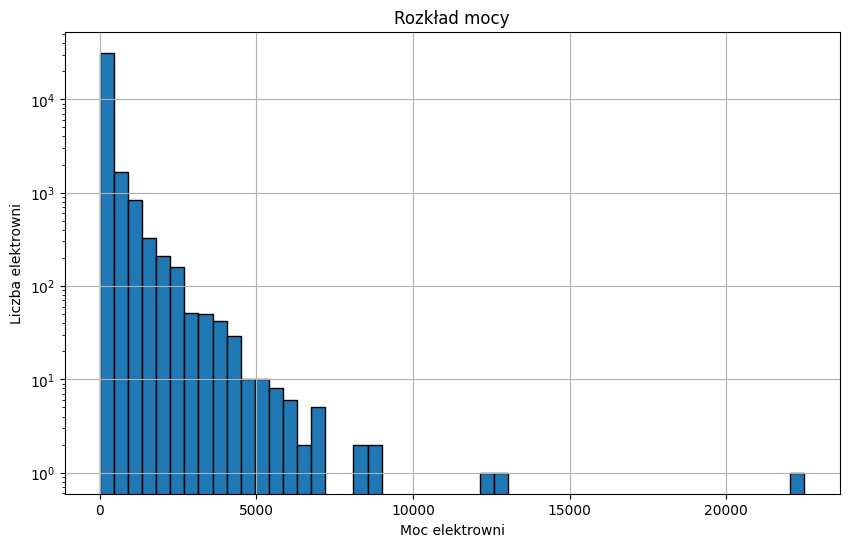

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(power_plant_df['capacity_mw'],bins = 50, edgecolor = 'black');
plt.title('Rozkład mocy')
plt.xlabel('Moc elektrowni')
#plt.xlim(0,5000)
plt.ylabel('Liczba elektrowni')
plt.yscale('log')
plt.grid(True)



13. Stwórz wykres słupkowy (Seaborn) przedstawiający średnią moc elektrowni dla każdego rodzaju paliwa (`primary_fuel`).


Text(0, 0.5, 'Moc (MW)')

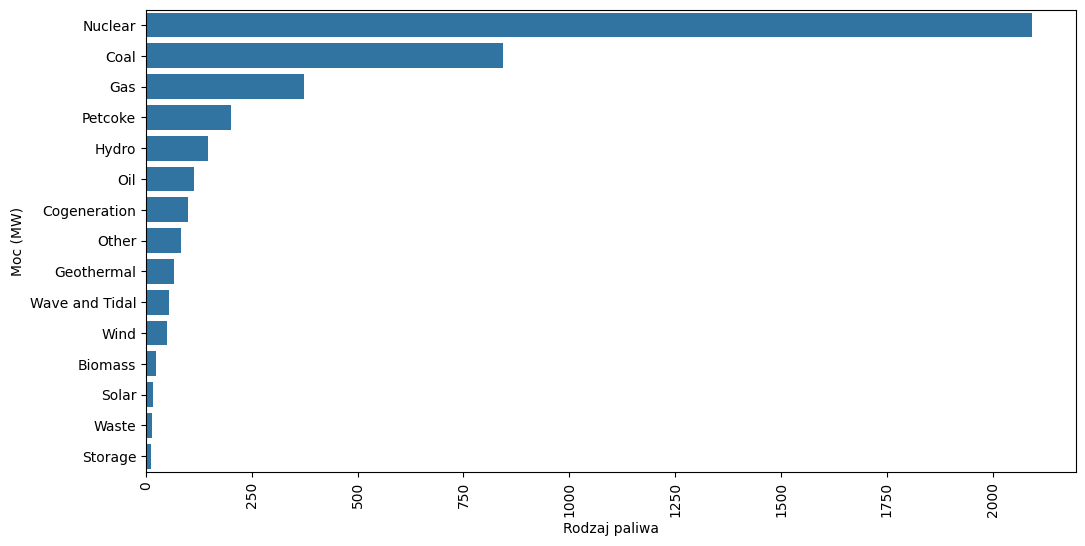

In [6]:
import seaborn as sns

mean_power = power_plant_df.groupby('primary_fuel')['capacity_mw'].mean().reset_index()
mean_power = mean_power.sort_values('capacity_mw', ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(mean_power, x = 'capacity_mw',y='primary_fuel')
plt.xticks(rotation = 90);
plt.xlabel('Rodzaj paliwa')
plt.ylabel('Moc (MW)')

14. Narysuj wykres `scatterplot` (Seaborn) pokazujący zależność między `capacity_mw` a `generation_gwh_2019` z podziałem na rodzaje paliwa (`hue=primary_fuel`).


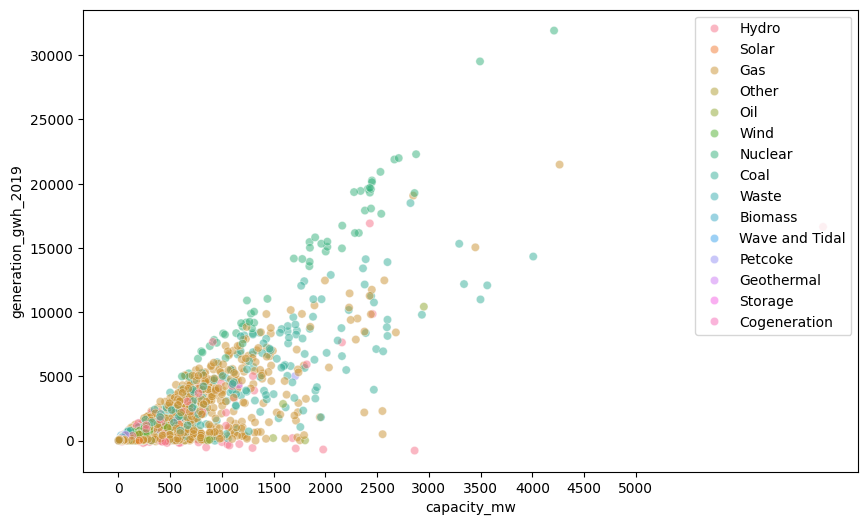

In [46]:
plt.figure(figsize = (10,6))
sns.scatterplot(power_plant_df,x='capacity_mw', y='generation_gwh_2019',hue = 'primary_fuel', alpha = 0.5)
plt.xticks(ticks= range(0,5001, 500))
plt.legend(loc= 'upper right');



15. Stwórz wykres `boxplot` (Seaborn) pokazujący rozkład mocy (`capacity_mw`) dla odnawialnych i nieodnawialnych źródeł energii.

---

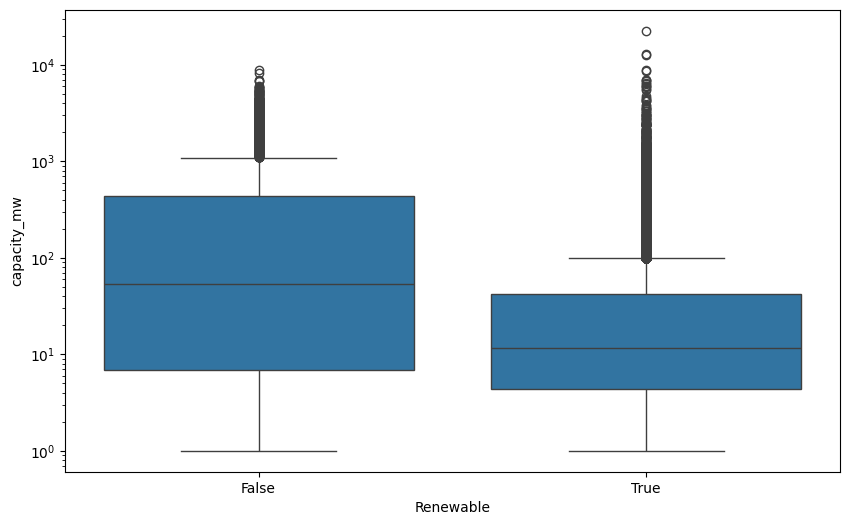

In [48]:
plt.figure(figsize = (10,6))
sns.boxplot(data = power_plant_df, x = 'Renewable', y = 'capacity_mw')
plt.yscale('log')
#True = odnawialne, False = nieodnawialne
#power_plant_df.columns


### **Część 5: Zaawansowane analizy**


16. Znajdź korelację między `capacity_mw` a generacją energii (`generation_gwh_2019`) i zinterpretuj wynik.


In [69]:
df_copy = power_plant_df.copy()

df_corr = df_copy[['capacity_mw', 'generation_gwh_2019']].dropna()
correlation = df_corr['capacity_mw'].corr(df_corr['generation_gwh_2019'])

print(f"Korelacja: {correlation:.3f}")


Korelacja: 0.854


17. Oblicz całkowitą generację energii odnawialnej (Solar, Wind, Hydro, Geothermal) w roku 2019 i porównaj ją z generacją nieodnawialną.


In [5]:
power_plant_df.groupby('Renewable')['generation_gwh_2019'].sum().reset_index()

KeyError: 'Renewable'

18. Wyświetl 10 krajów o największej średniej mocy odnawialnych elektrowni.


In [16]:
renewables = power_plant_df[power_plant_df['Renewable'] == True]

top10 = renewables.groupby('country')['capacity_mw'].mean().reset_index(name='AVG')
top10 = top10.sort_values(by='AVG', ascending= False).head(10)
top10


,country,AVG
115,PRY,2920.000000
144,VEN,1962.888889
82,LUX,1296.000000
93,MOZ,761.666667
148,ZWE,750.000000
125,SRB,597.500000
134,TJK,585.800000
83,LVA,512.000000
131,SYR,501.666667
81,LTU,500.400000


19. Stwórz `heatmap` przedstawiający korelację między wartościami numerycznymi (np. `capacity_mw`, `generation_gwh_2019`, `commissioning_year`).


<Axes: >

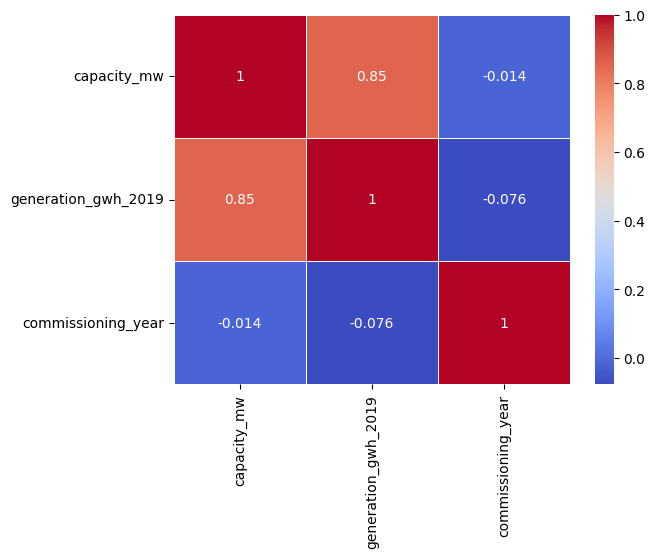

In [24]:
df_core = power_plant_df[['capacity_mw','generation_gwh_2019','commissioning_year']]
cor_matrix = df_core.corr()
cor_matrix
plt.figure()
sns.heatmap(data=cor_matrix,annot=True,cmap='coolwarm', linewidths=0.5)

# 📊 Zadania z datasetu Better Life Index


### **Część 1: Analiza podstawowa**


1. **Liczba krajów w zbiorze danych**  
   Wyświetl liczbę unikalnych krajów w zbiorze danych (`Country`).  
   **Hint:** Użyj metody `.nunique()` na kolumnie `Country`.

In [28]:
better_life_index_df['Country'].nunique()

38


2. **Średni wskaźnik `Life satisfaction`**  
   Policz średnią wartość wskaźnika `Life satisfaction` dla wszystkich krajów.  
   **Hint:** Użyj metody `.mean()` na kolumnie `Life satisfaction`.

In [31]:
better_life_index_df['Life satisfaction'].mean()

np.float64(6.686842105263159)

3. **5 krajów z najwyższym wskaźnikiem `Life satisfaction`**  
   Wyświetl 5 krajów z najwyższym wskaźnikiem `Life satisfaction`.  
   **Hint:** Użyj funkcji `.nlargest(5)`.

In [34]:
better_life_index_df.nlargest(5,'Life satisfaction')[['Country','Life satisfaction']]

,Country,Life satisfaction
10,Finland,7.9
15,Iceland,7.6
8,Denmark,7.5
25,Netherlands,7.5
34,Switzerland,7.5



4. **5 krajów z najniższym `GDP per capita (USD)`**  
   Wyświetl 5 krajów z najniższym wskaźnikiem `GDP per capita (USD)`.  
   **Hint:** Użyj funkcji `.nsmallest(5)`.

In [36]:
better_life_index_df.nsmallest(5,'GDP per capita (USD)')[['Country','GDP per capita (USD)']]

,Country,GDP per capita (USD)
5,Colombia,7327
35,Türkiye,12765
24,Mexico,15249
4,Chile,16616
6,Costa Rica,18031


5. **Średnia i mediana długości życia (`Life expectancy`)**  
   Oblicz średnią i medianę długości życia dla wszystkich krajów.  
   **Hint:** Użyj metody `.mean()` i `.median()` na kolumnie `Life expectancy`.

In [40]:
avg = better_life_index_df['Life expectancy'].mean()
median = better_life_index_df['Life expectancy'].median()

print('Avarange:',avg.round(2))
print('Median:',median.round(2))

Avarange: 80.98
Median: 81.9


### **Część 2: Filtrowanie i grupowanie danych**


6. **Kraje z `Rooms per person` > 2**  
   Znajdź kraje, w których wskaźnik `Rooms per person` jest większy niż 2.  
   **Hint:** Użyj filtrowania z operatorem warunkowym (`>`) na kolumnie `Rooms per person`.

In [44]:
mask = better_life_index_df['Rooms per person'] > 2
better_life_index_df[mask][['Country','Rooms per person']]

,Country,Rooms per person
2,Belgium,2.1
3,Canada,2.6
16,Ireland,2.1
26,New Zealand,2.4
27,Norway,2.1
37,United States,2.4


7. **Średni `GDP per capita (USD)` dla krajów z wysokim `Life satisfaction`**  
   Oblicz średnią wartość `GDP per capita (USD)` dla krajów, w których wskaźnik `Life satisfaction` wynosi więcej niż 7.  
   **Hint:** Użyj filtrowania oraz metody `.mean()`.

In [48]:
mask = better_life_index_df['Life satisfaction'] > 7
result = better_life_index_df[mask]['GDP per capita (USD)'].mean()
print('Mean:',result.round(2))

Mean: 72663.0


8. **Średnia długość życia dla grup `Life satisfaction`**  
   Grupuj dane według zaokrąglonych wartości `Life satisfaction` i oblicz średnią długość życia (`Life expectancy`) dla każdej grupy.  
   **Hint:** Użyj metody `.groupby()` oraz `.mean()` na zaokrąglonej kolumnie `Life satisfaction`.


In [50]:
better_life_index_df['Life satisfaction rounded'] = better_life_index_df['Life satisfaction'].round(2)
better_life_index_df.groupby('Life satisfaction rounded')['Life satisfaction'].mean().reset_index()

,Life satisfaction rounded,Life satisfaction
0,4.9,4.9
1,5.7,5.7
2,5.8,5.8
3,6.0,6.0
4,6.1,6.1
5,6.2,6.2
6,6.3,6.3
7,6.4,6.4
8,6.5,6.5
9,6.7,6.7



9. **Kraje z dużą ilością czasu na odpoczynek**  
   Policz liczbę krajów, w których `Time devoted to leisure and personal care` przekracza 15 godzin.  
   **Hint:** Użyj filtrowania z operatorem warunkowym (`>`) oraz metody `.count()`.


In [54]:
mask = better_life_index_df['Time devoted to leisure and personal care'] > 15
result = better_life_index_df[mask]['Country'].count()

print('Result:', result)


Result: 10


### **Część 3: Tworzenie nowych kolumn**



10. **Dodanie kolumny `Health Index`**  
    Dodaj nową kolumnę `Health Index`, będącą średnią `Life expectancy` i `Self-reported health`.  
    **Hint:** Użyj wyrażenia `DataFrame[["Column1", "Column2"]].mean(axis=1)`.

In [55]:
better_life_index_df['Health Index'] = better_life_index_df[['Life expectancy','Self-reported health']].mean(axis=1)
better_life_index_df[['Country', 'Life expectancy', 'Self-reported health', 'Health Index']]

,Country,Life expectancy,Self-reported health,Health Index
0,Australia,83.0,85,84.00
1,Austria,82.0,71,76.50
2,Belgium,82.1,74,78.05
3,Canada,82.1,89,85.55
4,Chile,80.6,60,70.30
5,Colombia,76.7,80,78.35
6,Costa Rica,80.5,73,76.75
7,Czechia,79.3,62,70.65
8,Denmark,81.5,70,75.75
9,Estonia,78.8,57,67.90



11. **Stworzenie kolumny `Safety Score`**  
    Dodaj kolumnę `Safety Score`, obliczaną jako różnica między `Feeling safe walking alone at night` a `Homicide rate`.  
    **Hint:** Wykonaj operację odejmowania między odpowiednimi kolumnami.


In [56]:
better_life_index_df['Safety Score']= better_life_index_df['Feeling safe walking alone at night'] - better_life_index_df['Homicide rate']
better_life_index_df

,Country,GDP per capita (USD),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,...,Life expectancy,Self-reported health,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Life satisfaction,Life satisfaction rounded,Health Index,Safety Score
0,Australia,66589,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,...,83.0,85,67,0.9,12.5,14.36,7.1,7.1,84.00,66.1
1,Austria,59225,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,...,82.0,71,86,0.5,5.3,14.51,7.2,7.2,76.50,85.5
2,Belgium,55536,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,...,82.1,74,56,1.1,4.3,15.52,6.8,6.8,78.05,54.9
3,Canada,54866,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,...,82.1,89,78,1.2,3.3,14.57,7.0,7.0,85.55,76.8
4,Chile,16616,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,...,80.6,60,41,2.4,7.7,NaN,6.2,6.2,70.30,38.6
5,Colombia,7327,12.3,NaN,1.0,NaN,NaN,NaN,58,1.1,...,76.7,80,50,23.1,23.7,NaN,5.7,5.7,78.35,26.9
6,Costa Rica,18031,2.3,17.0,1.2,16517.0,NaN,NaN,55,1.5,...,80.5,73,47,10.0,22.0,NaN,6.3,6.3,76.75,37.0
7,Czechia,29801,0.5,23.4,1.5,26664.0,NaN,2.3,74,0.6,...,79.3,62,77,0.7,4.5,NaN,6.9,6.9,70.65,76.3
8,Denmark,68898,0.5,23.3,1.9,33774.0,149864.0,4.5,74,0.9,...,81.5,70,85,0.5,1.1,NaN,7.5,7.5,75.75,84.5
9,Estonia,31855,5.7,17.0,1.7,23784.0,188627.0,5.4,74,1.2,...,78.8,57,79,1.9,2.2,14.98,6.5,6.5,67.90,77.1


### **Część 4: Wizualizacje**


12. **Histogram `Life satisfaction`**  
    Stwórz histogram przedstawiający rozkład wartości `Life satisfaction`.  
    **Hint:** Użyj funkcji `plt.hist()` z Matplotlib.

Text(0, 0.5, 'Country count')

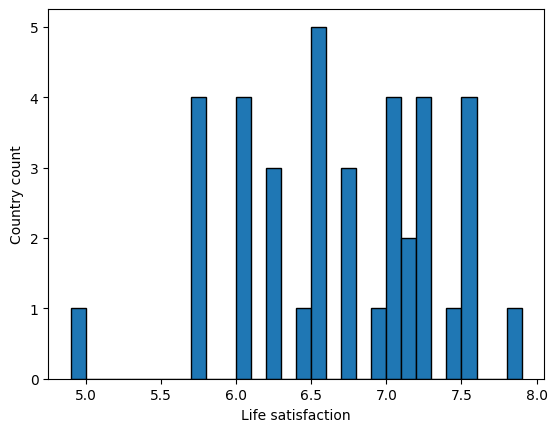

In [57]:
plt.hist(better_life_index_df['Life satisfaction'], bins = 30, edgecolor ='black')
plt.xlabel('Life satisfaction')
plt.ylabel('Country count')


13. **Średnia długość życia dla krajów z najwyższym `GDP per capita (USD)`**  
    Stwórz wykres słupkowy, pokazujący średnią długość życia (`Life expectancy`) dla 10 krajów o najwyższym `GDP per capita (USD)`.  
    **Hint:** Użyj `sns.barplot()` i funkcji `.nlargest(10)`.

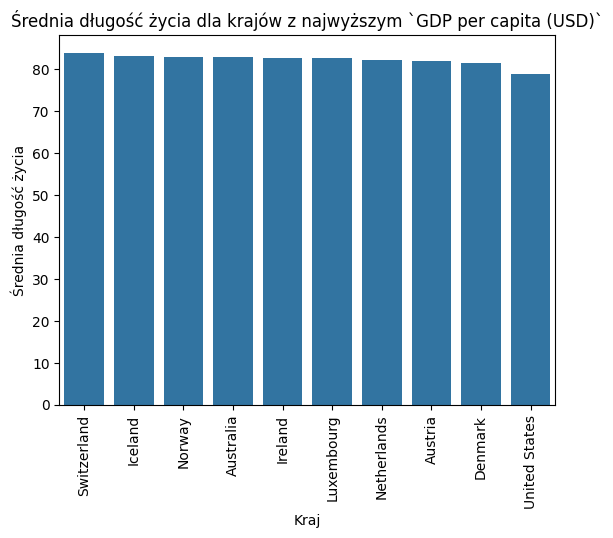

In [58]:
top10=better_life_index_df.nlargest(10,'GDP per capita (USD)')
top10=top10[['Life expectancy','Country']].sort_values(by='Life expectancy', ascending=False)
plt.figure()
sns.barplot(top10,x='Country',y='Life expectancy')
plt.title('Średnia długość życia dla krajów z najwyższym `GDP per capita (USD)`')
plt.xlabel('Kraj')
plt.ylabel('Średnia długość życia')
plt.xticks(rotation = 90)
plt.show()

14. **Scatterplot: `GDP per capita (USD)` vs `Life satisfaction`**  
    Narysuj `scatterplot` pokazujący zależność między `GDP per capita (USD)` a `Life satisfaction`.  
    **Hint:** Użyj `sns.scatterplot()`.

<Axes: xlabel='GDP per capita (USD)', ylabel='Life satisfaction'>

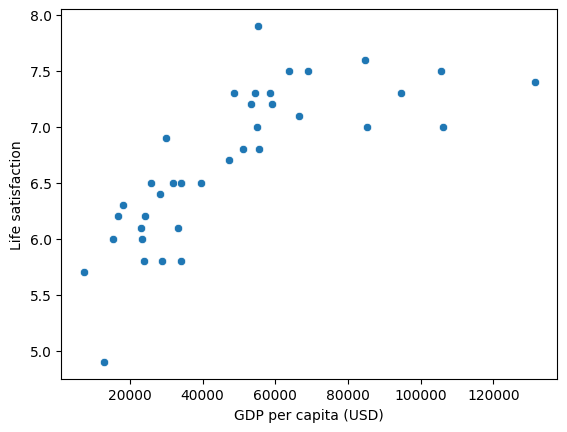

In [59]:
plt.figure()
sns.scatterplot(data=better_life_index_df, x='GDP per capita (USD)', y='Life satisfaction')


15. **Heatmap korelacji**  
    Stwórz `heatmap`, przedstawiającą korelacje między wszystkimi zmiennymi numerycznymi w zbiorze danych.  
    **Hint:** Użyj `df.corr()` oraz `sns.heatmap()` z odpowiednimi parametrami.

<Axes: >

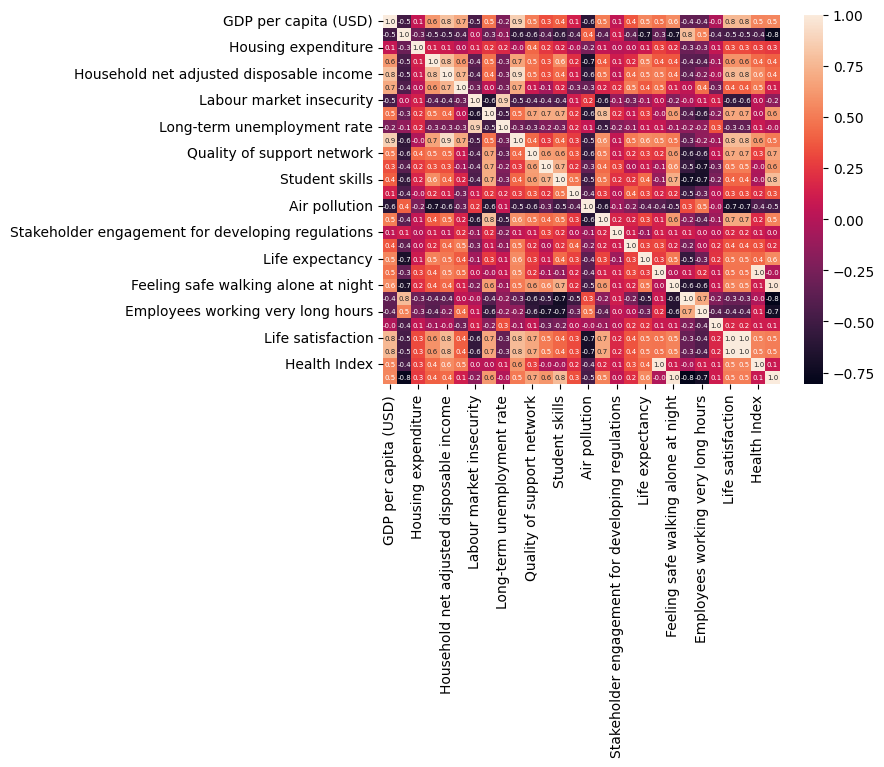

In [60]:
matrix = better_life_index_df.corr(numeric_only=True)

plt.figure()
sns.heatmap(matrix, annot=True, annot_kws={'size':5}, fmt='.1f')

# 📊 Zadania na połączonych danych Better Life Index i Global Power Plant Database



### **Część 1: Łączenie danych**

1. **Znajdź wspólne kraje**  
   Znajdź listę krajów, które występują w obu zbiorach danych: `Better Life Index` (`Country`) i `Global Power Plant Database` (`country_long`).  
   **Hint:** Użyj operacji zbiorów (`intersection`).

In [ ]:
set_better_life = set(better_life_index_df['Country'])
set_power_plant = set(power_plant_df['country_long'])

set_inter= set_better_life.intersection(set_power_plant)
set_inter

0           Australia
1             Austria
2             Belgium
3              Canada
4               Chile
5            Colombia
6          Costa Rica
7             Czechia
8             Denmark
9             Estonia
10            Finland
11             France
12            Germany
13             Greece
14            Hungary
15            Iceland
16            Ireland
17             Israel
18              Italy
19              Japan
20              Korea
21             Latvia
22          Lithuania
23         Luxembourg
24             Mexico
25        Netherlands
26        New Zealand
27             Norway
28             Poland
29           Portugal
30    Slovak Republic
31           Slovenia
32              Spain
33             Sweden
34        Switzerland
35            Türkiye
36     United Kingdom
37      United States
Name: Country, dtype: object

2. **Zagreguj dane o elektrowniach**  
   Dla każdego kraju w zbiorze `Global Power Plant Database` oblicz:
   - `total_capacity_mw`: Suma mocy elektrowni.
   - `avg_capacity_mw`: Średnia moc elektrowni.
   - `renewable_count`: Liczba elektrowni odnawialnych (Hydro, Solar, Wind, Geothermal).
   - `nonrenewable_count`: Liczba elektrowni nieodnawialnych (pozostałe).  
   **Hint:** Użyj metody `.groupby()` i funkcji agregujących.

In [11]:
power_plant_df_agg = power_plant_df.groupby('country_long').agg(
    total_capcity_mw = ('capacity_mw', 'sum'),
    avg_capacity_mw = ("capacity_mw", 'mean'),
    renewable_count = ('Renewable', lambda x: x.sum()),
    nonrenewable_count = ('Renewable', lambda x: (~x).sum()) ).reset_index()
print(power_plant_df_agg.head())

  country_long  total_capcity_mw  avg_capacity_mw  renewable_count  \
0  Afghanistan            300.55        33.394444                8   
1      Albania           1529.00       191.125000                7   
2      Algeria          15873.80       269.047458               28   
3       Angola           1071.18        76.512857                5   
4   Antarctica              7.60         3.800000                1   

   nonrenewable_count  
0                   1  
1                   1  
2                  31  
3                   9  
4                   1  


3. **Połącz dane o krajach**  
   Połącz dane z `Better Life Index` i zagregowane dane z `Global Power Plant Database`, dopasowując kraje.  
   **Hint:** Użyj metody `pd.merge()` z kluczami `Country` i `country_long`.

In [13]:
pd.merge(better_life_index_df,power_plant_df_agg,left_on='Country',right_on='country_long',how='inner')

,Country,GDP per capita (USD),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,...,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Life satisfaction,country_long,total_capcity_mw,avg_capacity_mw,renewable_count,nonrenewable_count
0,Australia,66589,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,...,67,0.9,12.5,14.36,7.1,Australia,65852.016000,135.497975,207,279
1,Austria,59225,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,...,86,0.5,5.3,14.51,7.2,Austria,11227.100000,109.000971,100,3
2,Belgium,55536,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,...,56,1.1,4.3,15.52,6.8,Belgium,13404.800000,194.272464,26,43
3,Canada,54866,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,...,78,1.2,3.3,14.57,7.0,Canada,143578.700000,123.881536,940,219
4,Chile,16616,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,...,41,2.4,7.7,NaN,6.2,Chile,22475.648667,71.351266,194,121
5,Colombia,7327,12.3,NaN,1.0,NaN,NaN,NaN,58,1.1,...,50,23.1,23.7,NaN,5.7,Colombia,10924.000000,436.960000,14,11
6,Costa Rica,18031,2.3,17.0,1.2,16517.0,NaN,NaN,55,1.5,...,47,10.0,22.0,NaN,6.3,Costa Rica,1968.400000,72.903704,24,3
7,Denmark,68898,0.5,23.3,1.9,33774.0,149864.0,4.5,74,0.9,...,85,0.5,1.1,NaN,7.5,Denmark,8085.200000,172.025532,32,15
8,Estonia,31855,5.7,17.0,1.7,23784.0,188627.0,5.4,74,1.2,...,79,1.9,2.2,14.98,6.5,Estonia,2541.900000,149.523529,13,4
9,Finland,55127,0.4,23.1,1.9,33471.0,230032.0,2.2,72,1.2,...,88,1.2,3.6,15.17,7.9,Finland,11796.760000,63.766270,107,78


### **Część 2: Analiza podstawowa**



4. **Statystyki mocy elektrowni**  
   Policz średnią, minimalną i maksymalną wartość `total_capacity_mw` dla wszystkich krajów.  
   **Hint:** Użyj metod `.mean()`, `.min()` i `.max()`.

In [9]:
stats = power_plant_df['capacity_mw'].agg(['mean','min','max'])
print(stats)

mean      163.355148
min         1.000000
max     22500.000000
Name: capacity_mw, dtype: float64




5. **Średnia liczba elektrowni**  
   Oblicz średnią liczbę odnawialnych (`renewable_count`) i nieodnawialnych (`nonrenewable_count`) elektrowni na kraj.  
   **Hint:** Użyj metod `.mean()`.

In [10]:
power_plant_df_count = power_plant_df.groupby('country_long').agg(
    renewable_count = ('Renewable',lambda x:x.sum()),
    nonrenewable_count = ('Renewable',lambda x: (~x).sum())).reset_index()

avg_renewable = power_plant_df_count['renewable_count'].mean()
avg_nonrenewable = power_plant_df_count['nonrenewable_count'].mean()

print(f"Average number of renewable power plants per country: {avg_renewable:.2f}")
print(f"Average number of nonrenewable power plants per country:: {avg_nonrenewable:.2f}")
    

KeyError: "Column(s) ['Renewable'] do not exist"

6. **5 krajów z największym udziałem odnawialnych elektrowni**  
   Znajdź 5 krajów, w których udział odnawialnych elektrowni (stosunek `renewable_count` do sumy wszystkich elektrowni) jest największy.  
   **Hint:** Oblicz udział jako `renewable_count / (renewable_count + nonrenewable_count)`.


In [ ]:
power_plant_df['Ratio'] = (power_plant_df_count['renewable_count']) / (power_plant_df_count['renewable_count'] + power_plant_df_count['renewable_count'])
# top5 = power_plant_df[['country_long','Ratio']].nlargest(5,'Ratio')
# top5
power_plant_df['Ratio']

0        0.5
1        0.5
2        0.5
3        0.5
4        0.5
        ... 
34931    NaN
34932    NaN
34933    NaN
34934    NaN
34935    NaN
Name: Ratio, Length: 34936, dtype: float64

7. **5 krajów z najniższą średnią mocą elektrowni**  
   Wyświetl 5 krajów z najniższą wartością `avg_capacity_mw`.  
   **Hint:** Użyj funkcji `.nsmallest()`.

In [ ]:

# power_plant_df.nsmallest(5,'avg_capacity_mw')[['Country']]

KeyError: 'avg_capacity_mw'

### **Część 3: Zależności między jakością życia a energetyką**


8. **Life satisfaction a udział odnawialnych elektrowni**  
   Oblicz korelację między `Life satisfaction` a udziałem odnawialnych elektrowni (`renewable_count / (renewable_count + nonrenewable_count)`).  
   **Hint:** Użyj metody `.corr()`.


9. **Life expectancy a moc odnawialnych elektrowni**  
   Oblicz średnią wartość `total_capacity_mw` dla krajów z `Life expectancy` powyżej i poniżej średniej.  
   **Hint:** Użyj filtrowania i funkcji `.mean()`.



10. **GDP per capita a całkowita moc elektrowni**  
    Narysuj wykres `scatterplot` (Seaborn), który pokazuje zależność między `GDP per capita (USD)` a `total_capacity_mw`.  
    **Hint:** Użyj `sns.scatterplot()`.


### **Część 4: Wizualizacje**



11. **Histogram mocy elektrowni**  
    Narysuj histogram przedstawiający rozkład `total_capacity_mw` w krajach.  
    **Hint:** Użyj `plt.hist()`.


12. **Wykres słupkowy: Renewable vs Nonrenewable**  
    Narysuj wykres słupkowy (Seaborn), który pokazuje średnią liczbę odnawialnych i nieodnawialnych elektrowni na kraj.  
    **Hint:** Użyj `sns.barplot()`.



13. **Heatmap korelacji**  
    Stwórz `heatmap`, która przedstawia korelacje między zmiennymi numerycznymi: `Life satisfaction`, `GDP per capita (USD)`, `total_capacity_mw`, `renewable_count`.  
    **Hint:** Użyj `sns.heatmap()`.



14. **Top 10 krajów z odnawialnymi elektrowniami**  
    Stwórz wykres słupkowy przedstawiający 10 krajów z najwyższą liczbą odnawialnych elektrowni (`renewable_count`).  
    **Hint:** Użyj funkcji `.nlargest()` i `sns.barplot()`.


15. **Rozkład odnawialnych i nieodnawialnych elektrowni**  
    Stwórz wykres `boxplot`, który pokazuje rozkład `total_capacity_mw` dla krajów z przewagą odnawialnych i nieodnawialnych elektrowni.  
    **Hint:** Użyj `sns.boxplot()` i stwórz kategorię na podstawie `renewable_count > nonrenewable_count`.
